## 前言


Pandas 是一个Python语言实现的，开源，易于使用的数据架构以及数据分析工具。在Pandas中主要有两种数据类型，可以简单的理解为：

- Series：一维数组(列表)
- DateFrame：二维数组（矩阵）


学习资料：

- [中文文档](https://www.pypandas.cn/docs/)
- [利用Python进行数据分析·第2版](https://github.com/iamseancheney/python_for_data_analysis_2nd_chinese_version)

## 导入pandas

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

## 创建列表

### 创建普通列表

In [2]:
s = pd.Series([1, 3, 6, np.nan, 23, 3]) # type(s) === 'pandas.core.series.Series'

### 创建时间列表

In [3]:
dates = pd.date_range('20200101', periods=6)

## 创建矩阵

### 根据列表（Series）创建矩阵

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])

In [5]:
df

,a,b,c,d
2020-01-01,-0.607602,-0.471377,-0.053180,0.503996
2020-01-02,1.279277,0.939577,0.400256,-1.473425
2020-01-03,0.486636,0.739391,-1.108869,-2.383560
2020-01-04,1.046003,0.497351,-1.286320,0.295304
2020-01-05,0.915046,0.679277,0.565314,-0.118499
2020-01-06,0.638652,0.967453,0.246463,1.138170


In [6]:
df2 = pd.DataFrame({
  'a':pd.Series([1, 2, 3, 4]),
  'b':pd.Timestamp('20180708'),
  'c':pd.Categorical(['cate1', 'cate2', 'cate3', 'cate4'])
})

In [7]:
df2

,a,b,c
0,1,2018-07-08,cate1
1,2,2018-07-08,cate2
2,3,2018-07-08,cate3
3,4,2018-07-08,cate4


### 根据字典创建矩阵

In [8]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy', 'Jack', 'Tim'], 
        'age': [20, 32, 36, 24, 23, 18, 27], 
        'gender': np.random.choice(['M','F'],size=7),
        'score': [25, 94, 57, 62, 70, 88, 67],
        'country': np.random.choice(['US','CN'],size=7),
        }
df3 = pd.DataFrame(data, columns = ['name', 'age', 'gender', 'score', 'country'])

In [9]:
df3

,name,age,gender,score,country
0,Jason,20,M,25,CN
1,Molly,32,F,94,CN
2,Tina,36,F,57,US
3,Jake,24,F,62,CN
4,Amy,23,F,70,CN
5,Jack,18,M,88,US
6,Tim,27,M,67,US


## 矩阵属性、检视数据

### 行数列数

In [10]:
df.shape

(6, 4)

### 索引

In [11]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

### 列名

In [12]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

### 值

In [13]:
df.values

array([[-0.60760195, -0.47137722, -0.05318022,  0.50399562],
       [ 1.27927737,  0.93957684,  0.40025596, -1.47342482],
       [ 0.48663635,  0.73939128, -1.10886909, -2.38355973],
       [ 1.04600346,  0.49735067, -1.28631959,  0.29530426],
       [ 0.91504614,  0.67927745,  0.56531388, -0.11849941],
       [ 0.63865211,  0.96745268,  0.24646345,  1.13817007]])

### 矩阵信息

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-01-01 to 2020-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      float64
 1   b       6 non-null      float64
 2   c       6 non-null      float64
 3   d       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


### 矩阵描述信息

In [15]:
df.describe()

,a,b,c,d
count,6.000000,6.000000,6.000000,6.000000
mean,0.626336,0.558612,-0.206056,-0.339669
std,0.667544,0.533696,0.796594,1.327462
min,-0.607602,-0.471377,-1.286320,-2.383560
25%,0.524640,0.542832,-0.844947,-1.134693
50%,0.776849,0.709334,0.096642,0.088402
75%,1.013264,0.889530,0.361808,0.451823
max,1.279277,0.967453,0.565314,1.138170


In [16]:
### 更改索引
df.index = pd.date_range('2020/06/01', periods=df.shape[0])

df

,a,b,c,d
2020-06-01,-0.607602,-0.471377,-0.053180,0.503996
2020-06-02,1.279277,0.939577,0.400256,-1.473425
2020-06-03,0.486636,0.739391,-1.108869,-2.383560
2020-06-04,1.046003,0.497351,-1.286320,0.295304
2020-06-05,0.915046,0.679277,0.565314,-0.118499
2020-06-06,0.638652,0.967453,0.246463,1.138170


### top5 数据

In [17]:
df.head(1)

,a,b,c,d
2020-06-01,-0.607602,-0.471377,-0.05318,0.503996


### tail5 数据

In [18]:
df.tail(5)

,a,b,c,d
2020-06-02,1.279277,0.939577,0.400256,-1.473425
2020-06-03,0.486636,0.739391,-1.108869,-2.383560
2020-06-04,1.046003,0.497351,-1.286320,0.295304
2020-06-05,0.915046,0.679277,0.565314,-0.118499
2020-06-06,0.638652,0.967453,0.246463,1.138170


### 某一列值统计

In [19]:
df['a'].value_counts(dropna=False)

 0.915046    1
 1.279277    1
-0.607602    1
 0.638652    1
 1.046003    1
 0.486636    1
Name: a, dtype: int64

### 查看每一列唯一值统计

In [20]:
df.apply(pd.Series.value_counts)

,a,b,c,d
-2.383560,NaN,NaN,NaN,1.0
-1.473425,NaN,NaN,NaN,1.0
-1.286320,NaN,NaN,1.0,NaN
-1.108869,NaN,NaN,1.0,NaN
-0.607602,1.0,NaN,NaN,NaN
-0.471377,NaN,1.0,NaN,NaN
-0.118499,NaN,NaN,NaN,1.0
-0.053180,NaN,NaN,1.0,NaN
0.246463,NaN,NaN,1.0,NaN
0.295304,NaN,NaN,NaN,1.0


## 排序

### 根据索引(index)排序

In [21]:
# sort_index(axis=, ascending=)
# axis：0-行排序，1-列排序; ascending：True-升序，False-降序
df.sort_index(axis=0, ascending=False)

,a,b,c,d
2020-06-06,0.638652,0.967453,0.246463,1.138170
2020-06-05,0.915046,0.679277,0.565314,-0.118499
2020-06-04,1.046003,0.497351,-1.286320,0.295304
2020-06-03,0.486636,0.739391,-1.108869,-2.383560
2020-06-02,1.279277,0.939577,0.400256,-1.473425
2020-06-01,-0.607602,-0.471377,-0.053180,0.503996


In [22]:
df.sort_index(axis=1, ascending=False)

,d,c,b,a
2020-06-01,0.503996,-0.053180,-0.471377,-0.607602
2020-06-02,-1.473425,0.400256,0.939577,1.279277
2020-06-03,-2.383560,-1.108869,0.739391,0.486636
2020-06-04,0.295304,-1.286320,0.497351,1.046003
2020-06-05,-0.118499,0.565314,0.679277,0.915046
2020-06-06,1.138170,0.246463,0.967453,0.638652


### 根据值排序

In [23]:
df.sort_values(by='a', ascending=False)

,a,b,c,d
2020-06-02,1.279277,0.939577,0.400256,-1.473425
2020-06-04,1.046003,0.497351,-1.286320,0.295304
2020-06-05,0.915046,0.679277,0.565314,-0.118499
2020-06-06,0.638652,0.967453,0.246463,1.138170
2020-06-03,0.486636,0.739391,-1.108869,-2.383560
2020-06-01,-0.607602,-0.471377,-0.053180,0.503996


In [24]:
df.sort_values(by=['a','b'], ascending=True)

,a,b,c,d
2020-06-01,-0.607602,-0.471377,-0.053180,0.503996
2020-06-03,0.486636,0.739391,-1.108869,-2.383560
2020-06-06,0.638652,0.967453,0.246463,1.138170
2020-06-05,0.915046,0.679277,0.565314,-0.118499
2020-06-04,1.046003,0.497351,-1.286320,0.295304
2020-06-02,1.279277,0.939577,0.400256,-1.473425


## 选取数据

### 选取某一列

In [25]:
df['a'] # 等效于df.a

2020-06-01   -0.607602
2020-06-02    1.279277
2020-06-03    0.486636
2020-06-04    1.046003
2020-06-05    0.915046
2020-06-06    0.638652
Freq: D, Name: a, dtype: float64

### 根据索引选取某几行数据

In [26]:
df['2020-06-01':'2020-06-02'] # 选取索引以2020-06-01开始，到2020-06-02结束的数据

,a,b,c,d
2020-06-01,-0.607602,-0.471377,-0.053180,0.503996
2020-06-02,1.279277,0.939577,0.400256,-1.473425


### 根据列名选择某几列数据

In [27]:
df[['c', 'b']]

,c,b
2020-06-01,-0.053180,-0.471377
2020-06-02,0.400256,0.939577
2020-06-03,-1.108869,0.739391
2020-06-04,-1.286320,0.497351
2020-06-05,0.565314,0.679277
2020-06-06,0.246463,0.967453


### 根据索引和列名选择数据

loc[行名选择, 列名选择]，未指定行名或列名，或者指定为:则表示选择当前所有行，或列

In [28]:
df.loc['2020-06-01']

a   -0.607602
b   -0.471377
c   -0.053180
d    0.503996
Name: 2020-06-01 00:00:00, dtype: float64

In [29]:
df.loc['2020-06-01', 'b']

-0.471377219119169

In [30]:
df.loc[:, 'b'] # type(df.loc[:, 'b']) === 'pandas.core.series.Series'，而type(df.loc[:, ['b']]) === ’pandas.core.frame.DataFrame‘

2020-06-01   -0.471377
2020-06-02    0.939577
2020-06-03    0.739391
2020-06-04    0.497351
2020-06-05    0.679277
2020-06-06    0.967453
Freq: D, Name: b, dtype: float64

In [31]:
df.loc[:, ['a', 'b']]

,a,b
2020-06-01,-0.607602,-0.471377
2020-06-02,1.279277,0.939577
2020-06-03,0.486636,0.739391
2020-06-04,1.046003,0.497351
2020-06-05,0.915046,0.679277
2020-06-06,0.638652,0.967453


### 根据行索引和列索引取数据

In [32]:
df.iloc[0,0] # === df.loc['2020-06-01', 'a']

-0.6076019514774673

In [33]:
df.iloc[0, :] # ==== df.loc['2020-06-01', :]

a   -0.607602
b   -0.471377
c   -0.053180
d    0.503996
Name: 2020-06-01 00:00:00, dtype: float64

### 根据布尔表达式表达式取数据

只有当布尔表达式为真时的数据才会被选择

In [34]:
df[df.a > 1]

,a,b,c,d
2020-06-02,1.279277,0.939577,0.400256,-1.473425
2020-06-04,1.046003,0.497351,-1.286320,0.295304


In [35]:
df[(df['a'] > 1) & (df['d'] <0)]

,a,b,c,d
2020-06-02,1.279277,0.939577,0.400256,-1.473425


## 添加/删除列、更新、替换数据

### 设置某矩阵项值

In [36]:
df.loc['2020-06-01', 'a'] = np.nan
df.loc['2020-06-06', 'c'] = np.nan

In [37]:
df

,a,b,c,d
2020-06-01,NaN,-0.471377,-0.053180,0.503996
2020-06-02,1.279277,0.939577,0.400256,-1.473425
2020-06-03,0.486636,0.739391,-1.108869,-2.383560
2020-06-04,1.046003,0.497351,-1.286320,0.295304
2020-06-05,0.915046,0.679277,0.565314,-0.118499
2020-06-06,0.638652,0.967453,NaN,1.138170


### 根据条件创建新列

In [38]:
df['e'] = np.where((df['a'] > 1) & (df['d']<0), 1, 0)

In [39]:
df

,a,b,c,d,e
2020-06-01,NaN,-0.471377,-0.053180,0.503996,0
2020-06-02,1.279277,0.939577,0.400256,-1.473425,1
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0
2020-06-06,0.638652,0.967453,NaN,1.138170,0


### 根据已有列创建新列

In [40]:
tmp = df.copy()
df.loc[:,'f'] = tmp.apply(lambda row: row['b']+ row['d'], axis=1)

In [41]:
df

,a,b,c,d,e,f
2020-06-01,NaN,-0.471377,-0.053180,0.503996,0,0.032618
2020-06-02,1.279277,0.939577,0.400256,-1.473425,1,-0.533848
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0,0.792655
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0,0.560778
2020-06-06,0.638652,0.967453,NaN,1.138170,0,2.105623


### 替换数据

In [42]:
# 将所有等于1的值替换成20
df.replace(1,20)

,a,b,c,d,e,f
2020-06-01,NaN,-0.471377,-0.053180,0.503996,0,0.032618
2020-06-02,1.279277,0.939577,0.400256,-1.473425,20,-0.533848
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0,0.792655
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0,0.560778
2020-06-06,0.638652,0.967453,NaN,1.138170,0,2.105623


In [43]:
# 使用one替换1，three替换3
df.replace([1,3],['one','three'])

,a,b,c,d,e,f
2020-06-01,NaN,-0.471377,-0.053180,0.503996,0,0.032618
2020-06-02,1.279277,0.939577,0.400256,-1.473425,one,-0.533848
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0,0.792655
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0,0.560778
2020-06-06,0.638652,0.967453,NaN,1.138170,0,2.105623


### 列名重命名

In [44]:
df.rename(columns={'c':'cc'})

,a,b,cc,d,e,f
2020-06-01,NaN,-0.471377,-0.053180,0.503996,0,0.032618
2020-06-02,1.279277,0.939577,0.400256,-1.473425,1,-0.533848
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0,0.792655
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0,0.560778
2020-06-06,0.638652,0.967453,NaN,1.138170,0,2.105623


### 重设索引

In [45]:
# 将a设置为索引
df.set_index('a')

,b,c,d,e,f
a,,,,,
NaN,-0.471377,-0.053180,0.503996,0,0.032618
1.279277,0.939577,0.400256,-1.473425,1,-0.533848
0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
1.046003,0.497351,-1.286320,0.295304,0,0.792655
0.915046,0.679277,0.565314,-0.118499,0,0.560778
0.638652,0.967453,NaN,1.138170,0,2.105623


### 删除列

In [46]:
df.drop(columns=['a', 'f'])

,b,c,d,e
2020-06-01,-0.471377,-0.053180,0.503996,0
2020-06-02,0.939577,0.400256,-1.473425,1
2020-06-03,0.739391,-1.108869,-2.383560,0
2020-06-04,0.497351,-1.286320,0.295304,0
2020-06-05,0.679277,0.565314,-0.118499,0
2020-06-06,0.967453,NaN,1.138170,0


### 处理Nan数据

### 检查是否Nan值

In [47]:
df.isnull()

,a,b,c,d,e,f
2020-06-01,True,False,False,False,False,False
2020-06-02,False,False,False,False,False,False
2020-06-03,False,False,False,False,False,False
2020-06-04,False,False,False,False,False,False
2020-06-05,False,False,False,False,False,False
2020-06-06,False,False,True,False,False,False


In [48]:
df.notnull() # df.isnull()反操作

,a,b,c,d,e,f
2020-06-01,False,True,True,True,True,True
2020-06-02,True,True,True,True,True,True
2020-06-03,True,True,True,True,True,True
2020-06-04,True,True,True,True,True,True
2020-06-05,True,True,True,True,True,True
2020-06-06,True,True,False,True,True,True


### 删除掉包含null值的行

In [49]:
### dropna(axis=, how=)：丢弃NaN数据，
# axis：0-按行丢弃)，1-按列丢弃; how：'any'-只要含有NaN数据就丢弃，'all'-所有数据都为NaN时丢弃

df.dropna(axis=0)

,a,b,c,d,e,f
2020-06-02,1.279277,0.939577,0.400256,-1.473425,1,-0.533848
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0,0.792655
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0,0.560778


### 替换Nan

In [50]:
#### 使用1000替换Nan
df.fillna(1000)

,a,b,c,d,e,f
2020-06-01,1000.000000,-0.471377,-0.053180,0.503996,0,0.032618
2020-06-02,1.279277,0.939577,0.400256,-1.473425,1,-0.533848
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0,0.792655
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0,0.560778
2020-06-06,0.638652,0.967453,1000.000000,1.138170,0,2.105623


In [51]:
# 使用平均值替换所有null值
df.fillna(df.mean())

,a,b,c,d,e,f
2020-06-01,0.873123,-0.471377,-0.053180,0.503996,0,0.032618
2020-06-02,1.279277,0.939577,0.400256,-1.473425,1,-0.533848
2020-06-03,0.486636,0.739391,-1.108869,-2.383560,0,-1.644168
2020-06-04,1.046003,0.497351,-1.286320,0.295304,0,0.792655
2020-06-05,0.915046,0.679277,0.565314,-0.118499,0,0.560778
2020-06-06,0.638652,0.967453,-0.296560,1.138170,0,2.105623


## 聚合、分组、统计

### 返回每一列的平均数

In [52]:
df.mean()

a    0.873123
b    0.558612
c   -0.296560
d   -0.339669
e    0.166667
f    0.218943
dtype: float64

### 返回列之间的相关性

In [53]:
df.corr()

,a,b,c,d,e,f
a,1.000000,-0.067164,0.489169,0.057103,0.717130,0.047609
b,-0.067164,1.000000,0.017209,-0.304432,0.349701,0.101941
c,0.489169,0.017209,1.000000,0.149822,0.455361,0.200807
d,0.057103,-0.304432,0.149822,1.000000,-0.418411,0.916538
e,0.717130,0.349701,0.455361,-0.418411,1.000000,-0.290141
f,0.047609,0.101941,0.200807,0.916538,-0.290141,1.000000


### 返回每一列中非null值数量

In [54]:
df.count()

a    5
b    6
c    5
d    6
e    6
f    6
dtype: int64

### 返回每一列中最大值

In [55]:
df.max()

a    1.279277
b    0.967453
c    0.565314
d    1.138170
e    1.000000
f    2.105623
dtype: float64

### 返回每一列中最小值

In [56]:
df.min()

a    0.486636
b   -0.471377
c   -1.286320
d   -2.383560
e    0.000000
f   -1.644168
dtype: float64

### 返回每一列的中值

In [57]:
df.median()

a    0.915046
b    0.709334
c   -0.053180
d    0.088402
e    0.000000
f    0.296698
dtype: float64

### 返回每一列的标准偏差

In [58]:
df.std()

a    0.316605
b    0.533696
c    0.855436
d    1.327462
e    0.408248
f    1.271075
dtype: float64

### 分组后取TopN

In [59]:
### 取每个国家下，分值前二的记录

# 先排序
df4 = df3.sort_values(['country','score'],ascending=[1, 0],inplace=False)
df4

,name,age,gender,score,country
1,Molly,32,F,94,CN
4,Amy,23,F,70,CN
3,Jake,24,F,62,CN
0,Jason,20,M,25,CN
5,Jack,18,M,88,US
6,Tim,27,M,67,US
2,Tina,36,F,57,US


In [60]:
# 取值
df4.groupby(['country']).head(2)

,name,age,gender,score,country
1,Molly,32,F,94,CN
4,Amy,23,F,70,CN
5,Jack,18,M,88,US
6,Tim,27,M,67,US


### 多重分组后取TopN

In [61]:
### 取每个国家下，分值前二的记录

# 先排序
df5 = df3.sort_values(['country','gender', 'score'],ascending=[1, 0, 0],inplace=False)
df5

,name,age,gender,score,country
0,Jason,20,M,25,CN
1,Molly,32,F,94,CN
4,Amy,23,F,70,CN
3,Jake,24,F,62,CN
5,Jack,18,M,88,US
6,Tim,27,M,67,US
2,Tina,36,F,57,US


In [62]:
df5 = df5.groupby(['country', 'gender']).head(1) # 注意此处取1
df5

,name,age,gender,score,country
0,Jason,20,M,25,CN
1,Molly,32,F,94,CN
5,Jack,18,M,88,US
2,Tina,36,F,57,US


In [63]:
df5.groupby(['country']).head(2)

,name,age,gender,score,country
0,Jason,20,M,25,CN
1,Molly,32,F,94,CN
5,Jack,18,M,88,US
2,Tina,36,F,57,US


### 分组之后取平均值

In [64]:
scoreMean = df3.groupby(['gender'])['score'].mean()
scoreMean = pd.DataFrame(scoreMean) # 等效于socreMean = scoreMean.to_frame()
scoreMean

,score
gender,
F,70.75
M,60.00


In [65]:
#### 合并
df3.merge(scoreMean,left_on='gender',right_index=True)

,name,age,gender,score_x,country,score_y
0,Jason,20,M,25,CN,60.00
5,Jack,18,M,88,US,60.00
6,Tim,27,M,67,US,60.00
1,Molly,32,F,94,CN,70.75
2,Tina,36,F,57,US,70.75
3,Jake,24,F,62,CN,70.75
4,Amy,23,F,70,CN,70.75


In [66]:
df3

,name,age,gender,score,country
0,Jason,20,M,25,CN
1,Molly,32,F,94,CN
2,Tina,36,F,57,US
3,Jake,24,F,62,CN
4,Amy,23,F,70,CN
5,Jack,18,M,88,US
6,Tim,27,M,67,US


### 分组之后计数

In [67]:
df3.groupby(['country'])['gender'].count().to_frame()

,gender
country,
CN,4
US,3


In [68]:
### 按性别统计每个国家的人数

df3.groupby(['country', 'gender'])['gender'].count().to_frame()

gender
country gender        
CN      F            3
        M            1
US      F            1
        M            2

### 分组后唯一值统计

In [69]:
df3.groupby(['country'])['gender'].nunique().to_frame()

,gender
country,
CN,2
US,2


### 分组后求和

In [70]:
# 默认是所有数值类型列求和
df3.groupby('country').sum() 

,age,score
country,,
CN,99,251
US,81,212


In [71]:
# 指定列求和
df3.groupby('country')['score'].sum() # 等效于df3.groupby(['country'])['score'].apply(np.sum)

country
CN    251
US    212
Name: score, dtype: int64

In [72]:
# 分组后指定列求和（其他聚合也类似)可以理解成Split, apply, combine
Image(url="http://static.cyub.vip/images/202001/pandas.split-apply-combine.png")

In [73]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

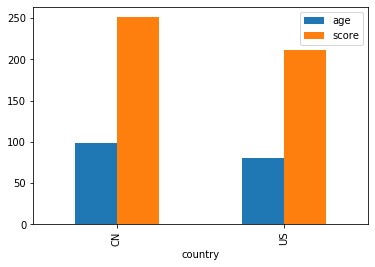

In [74]:
plt.clf()
df3.groupby('country').sum().plot(kind='bar')
plt.show()

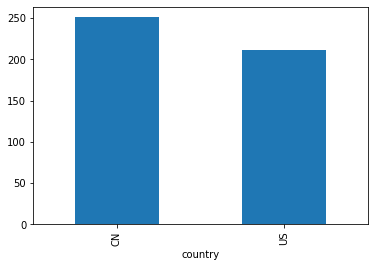

In [75]:
df3.groupby('country')['score'].sum().plot(kind='bar')

### 分组后求平均值，最大值，最小值

In [76]:
df3.groupby('country').agg({'score':['min','max','mean']})

score               
          min max       mean
country                     
CN         25  94  62.750000
US         57  88  70.666667

In [77]:
# 跟上面效果一致
df3.groupby('country')['score'].agg([np.min, np.max, np.mean])

,amin,amax,mean
country,,,
CN,25,94,62.750000
US,57,88,70.666667


### 分组后不同列使用不同求值函数

In [78]:
df3.groupby('country').agg({'score': ['max','min', 'std'],
                        'age': ['sum', 'count', 'max']})

score                age          
          max min        std sum count max
country                                   
CN         94  25  28.605069  99     4  32
US         88  57  15.821926  81     3  36

### 多个分组结果拼接

In [79]:
t1=df3.groupby('country')['score'].mean().to_frame()
t2 = df3.groupby('country')['age'].sum().to_frame()

t1.merge(t2,left_index=True,right_index=True)

,score,age
country,,
CN,62.750000,99
US,70.666667,81


### 遍历分组

In [80]:
grouped = df3.groupby('country')
for name,group in grouped:
    print(name)
    print(group)

CN
    name  age gender  score country
0  Jason   20      M     25      CN
1  Molly   32      F     94      CN
3   Jake   24      F     62      CN
4    Amy   23      F     70      CN
US
   name  age gender  score country
2  Tina   36      F     57      US
5  Jack   18      M     88      US
6   Tim   27      M     67      US


In [81]:
grouped = df3.groupby(['country', 'gender'])
for name,group in grouped:
    print(name)
    print(group)

('CN', 'F')
    name  age gender  score country
1  Molly   32      F     94      CN
3   Jake   24      F     62      CN
4    Amy   23      F     70      CN
('CN', 'M')
    name  age gender  score country
0  Jason   20      M     25      CN
('US', 'F')
   name  age gender  score country
2  Tina   36      F     57      US
('US', 'M')
   name  age gender  score country
5  Jack   18      M     88      US
6   Tim   27      M     67      US


### 获取分组信息

In [82]:
df3.groupby('country').groups

{'CN': Int64Index([0, 1, 3, 4], dtype='int64'),
 'US': Int64Index([2, 5, 6], dtype='int64')}

### 取分组后的某一组

In [83]:
df3.groupby('country').get_group('CN')

,name,age,gender,score,country
0,Jason,20,M,25,CN
1,Molly,32,F,94,CN
3,Jake,24,F,62,CN
4,Amy,23,F,70,CN


### 分组后过滤

In [84]:
df3.groupby('name').filter(lambda x: len(x) >= 3)

,name,age,gender,score,country


## 数据透视

In [85]:
# 数据透视的值项只能是数值类型
# pivot(index =,columns=,values=)：透视数据
# index：透视的列（作为索引, 且值都是唯一的）; columns-用于进一步细分index；values查看具体值

df3.pivot(index ='name',columns='gender',values=['score','age'])

score         age      
gender     F     M     F     M
name                          
Amy     70.0   NaN  23.0   NaN
Jack     NaN  88.0   NaN  18.0
Jake    62.0   NaN  24.0   NaN
Jason    NaN  25.0   NaN  20.0
Molly   94.0   NaN  32.0   NaN
Tim      NaN  67.0   NaN  27.0
Tina    57.0   NaN  36.0   NaN

In [86]:
# pivot_table(index =,columns=,values=)：透视数据
# index：透视的列（作为索引, 且值都是唯一的）; columns-用于进一步细分index；values查看具体值；fill_value:0-用0替换Nan; margins:True-汇总

pd.pivot_table(df3,index=['country', 'gender'], values=['score'],aggfunc=np.sum)

score
country gender       
CN      F         226
        M          25
US      F          57
        M         155

In [87]:
pd.pivot_table(df3,index=['country', 'gender'], values=['score', 'age'],aggfunc=[np.sum, np.mean],fill_value=0,margins=True)

sum             mean           
                age score        age      score
country gender                                 
CN      F        79   226  26.333333  75.333333
        M        20    25  20.000000  25.000000
US      F        36    57  36.000000  57.000000
        M        45   155  22.500000  77.500000
All             180   463  25.714286  66.142857

In [88]:
df3

,name,age,gender,score,country
0,Jason,20,M,25,CN
1,Molly,32,F,94,CN
2,Tina,36,F,57,US
3,Jake,24,F,62,CN
4,Amy,23,F,70,CN
5,Jack,18,M,88,US
6,Tim,27,M,67,US


## 合并、连接、拼接（Merge, join, and concatenate）

### 拼接(concatenate)

In [89]:
t1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']},
    index=[0, 1, 2, 3])
print('-----t1----')
print(t1)

t2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']},
    index=[4, 5, 6, 7])

print('----t2-----')
print(t2)

t3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
    'B': ['B8', 'B9', 'B10', 'B11'],
    'C': ['C8', 'C9', 'C10', 'C11'],
    'D': ['D8', 'D9', 'D10', 'D11']},
    index=[8, 9, 10, 11])

print('-----t3----')
print(t2)
frames = [t1, t2, t3]

pd.concat(frames)

-----t1----
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
----t2-----
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
-----t3----
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [90]:
# concat类似：linux的split命令把文件分成多个，然后在拼接成一个完成文件

Image(url="http://static.cyub.vip/images/202001/pandas.concat.png")

In [91]:
t4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
    'D': ['D2', 'D3', 'D6', 'D7'],
    'F': ['F2', 'F3', 'F6', 'F7']},
    index=[2, 3, 6, 7])

print('-----t4----')

pd.concat([t1, t4], axis=1, sort=False) # 此时相当于out joiner

-----t4----


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [92]:
Image(url="http://static.cyub.vip/images/202001/pandas.concat.outer_join.png")

In [93]:
pd.concat([t1, t4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [94]:
Image(url="http://static.cyub.vip/images/202001/pandas.concat.inner_join.png")

In [95]:
t1.append([t2,t3]) # 相当于pd.concat([t1, t2, t3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### 连接（Join）

join(on=None, how='left', lsuffix='', rsuffix='', sort=False)

on:join的键，默认是矩阵的index, how:join方式，left-相当于左连接,outer,inner

更多查看[Database-style DataFrame or named Series joining/merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

[Combining Datasets: Merge and Join](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html)

In [96]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
   'B': ['B0', 'B1', 'B2']},
   index=['K0', 'K1', 'K2'])

print('----left----')
print(left)

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
   'D': ['D0', 'D2', 'D3']},
   index=['K0', 'K2', 'K3'])
print('---right----')
print(right)

left.join(right) # 相当于 pd.merge(left, right, left_index=True, right_index=True, how='left')

----left----
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
---right----
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [97]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.left.png")

In [98]:
left.join(right, how='outer') # 相当于pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [99]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.outer.png")

In [100]:
left.join(right, how='inner') #相当于pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [101]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.inner.png")

### 根据某一列进行join

left.join(right, on=key_or_keys)= pd.merge(left, right, left_on=key_or_keys, right_index=True,
      how='left', sort=False) // 使用left矩阵的key_or_keys列与right矩阵的index进行join

In [102]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
     'key': ['K0', 'K1', 'K0', 'K1']})

print('----left----')
print(left)

right = pd.DataFrame({'C': ['C0', 'C1'],
    'D': ['D0', 'D1']},
    index=['K0', 'K1'])

print('----right----')
print(right)


left.join(right, on='key') # 相当于pd.merge(left, right, left_on='key', right_index=True,how='left', sort=False);

----left----
    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K0
3  A3  B3  K1
----right----
     C   D
K0  C0  D0
K1  C1  D1


,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [103]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.key.left.png")

In [104]:
#### 多列的join

left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
   'key1': ['K0', 'K0', 'K1', 'K2'],
   'key2': ['K0', 'K1', 'K0', 'K1']})

print('----left----')
print(left)

index = pd.MultiIndex.from_tuples([('K0', 'K0'), ('K1', 'K0'),
    ('K2', 'K0'), ('K3', 'K11')])


right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']},
    index=index)

print('----right----')
print(right)

left.join(right, on=['key1', 'key2'])

----left----
    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
----right----
         C   D
K0 K0   C0  D0
K1 K0   C1  D1
K2 K0   C2  D2
K3 K11  C3  D3


,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,NaN,NaN


In [105]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.keys.left.png")

In [106]:
left.join(right, on=['key1', 'key2'], how='inner')

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
2,A2,B2,K1,K0,C1,D1


In [107]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.keys.inner.png")

## 数据导入导出

### 从csv中导入数据

In [108]:
pd.read_csv('../dataset/game_daily_stats_20200127_20200202.csv', names=['id', '日期', '游戏id', '游戏名称', '国家', '国家码', '下载数', '下载用户数', '成功下载数', '成功下载用户数','安装数', '安装用户数'],na_filter = False)

,id,日期,游戏id,游戏名称,国家,国家码,下载数,下载用户数,成功下载数,成功下载用户数,安装数,安装用户数
0,7564316,2020-01-27,1,Uphill Rush Water Park Racing,俄罗斯,RU,1,1,1,1,1,1
1,7564317,2020-01-27,1,Uphill Rush Water Park Racing,肯尼亚,KE,2,2,2,2,0,0
2,7564318,2020-01-27,1,Uphill Rush Water Park Racing,刚果金,CD,1,1,0,0,0,0
3,7564319,2020-01-27,1,Uphill Rush Water Park Racing,尼泊尔,NP,1,1,0,0,0,0
4,7564320,2020-01-27,1,Uphill Rush Water Park Racing,索马里,SO,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179886,8010481,2020-02-02,175,Soccer Star 2022 World Legend: Football game,赞比亚,ZM,2,2,0,0,0,0
179887,8010482,2020-02-02,175,Soccer Star 2022 World Legend: Football game,尼日利亚,NG,1,1,2,2,2,2
179888,8010483,2020-02-02,175,Soccer Star 2022 World Legend: Football game,埃及,EG,2,2,0,0,0,0
179889,8010484,2020-02-02,175,Soccer Star 2022 World Legend: Football game,科特迪瓦,CI,3,3,2,2,2,2


### 导出数据到csv

In [109]:
df.to_csv('/tmp/pandas.csv', encoding="utf_8_sig")